# Project 3

- **Dataset(s) to be used:** https://databank.worldbank.org/reports.aspx?source=2&series=SE.ADT.LITR.ZS&country=#
- **Analysis question:**
- Can we think of GDP per capita as a proxy of development? 
- Is the GDP per capita correlated with development indicators like adolescent fertility, literacy, life expectancy, and Mortality rate?
- Is the GDP per capita correlated with development indicators related to education?
- **Columns that will (likely) be used:**
  - Country Name
  - Series Name
  - Years
- (If you're using multiple datasets) **Columns to be used to merge/join them:**
  - [Dataset 1] [column]
  - [Dataset 2] [column]
- **Hypothesis**: [hypothesis]
- **Site URL:** [URL from Publish section]

First I import the libraries that i will be using, then I upload the data and display the first 10 columns to see how it looks, and if I uploaded correctly. 

In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [71]:
import pandas as pd
import plotly.express as px
import numpy as np
import statsmodels.api as sm
wb_df = pd.read_csv("/Users/josefinadesolminihac/Downloads/P_Data_Extract_From_World_Development_Indicators (4)/14166b9b-2815-4b64-995f-dcda863a29a5_Data.csv")
wb_df.head(10)

,Series Name,Series Code,Country Name,Country Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Afghanistan,AFG,..,..,33.7538414001465,..,..,..,..,..,37,..,..
1,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Albania,ALB,..,..,..,..,98.8162307739258,..,..,..,..,98.5,..
2,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Algeria,DZA,..,..,..,..,..,81.4078369140625,..,..,..,..,..
3,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..
4,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..
5,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Angola,AGO,..,66,66.2358627319336,..,..,..,..,..,..,72.4000015258789,..
6,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Antigua and Barbuda,ATG,..,..,..,..,..,..,..,..,..,..,..
7,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Argentina,ARG,..,..,..,..,..,..,..,..,..,..,..
8,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Armenia,ARM,..,..,..,100,100,..,..,100,..,..,..
9,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Aruba,ABW,..,..,..,..,..,..,..,97.9899978637695,..,..,..


Then, I explore the data and proceed with data cleaning, including changing the types of the different columns.

In [6]:
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    6729 non-null   object
 1   Series Code    6727 non-null   object
 2   Country Name   6727 non-null   object
 3   Country Code   6727 non-null   object
 4   2013 [YR2013]  6727 non-null   object
 5   2014 [YR2014]  6727 non-null   object
 6   2015 [YR2015]  6727 non-null   object
 7   2016 [YR2016]  6727 non-null   object
 8   2017 [YR2017]  6727 non-null   object
 9   2018 [YR2018]  6727 non-null   object
 10  2019 [YR2019]  6727 non-null   object
 11  2020 [YR2020]  6727 non-null   object
 12  2021 [YR2021]  6727 non-null   object
 13  2022 [YR2022]  6727 non-null   object
 14  2023 [YR2023]  6727 non-null   object
dtypes: object(15)
memory usage: 789.0+ KB


In [8]:
wb_df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
      dtype='object')

In [10]:
#Rename the columns
column_renames = {'2013 [YR2013]':"2013",
                  '2014 [YR2014]':"2014",
                  '2015 [YR2015]':"2015",
                  '2016 [YR2016]':"2016",
                  '2017 [YR2017]':"2017",
                  '2018 [YR2018]':"2018",
                  '2019 [YR2019]':"2019",
                  '2020 [YR2020]':"2020",
                  '2021 [YR2021]':"2021",
                  '2022 [YR2022]':"2022",
                  '2023 [YR2023]':"2023"
                 }
wb_df = wb_df.rename(columns=column_renames)
wb_df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [12]:
#Replace the ".." with NaN
wb_df = wb_df.replace('..', np.nan)

#Convert the columns types to float
columns_to_convert = ['2013','2014', '2015', '2016', '2017', '2018', 
                      '2019', '2020', '2021', '2022', '2023']

wb_df[columns_to_convert] = wb_df[columns_to_convert].astype(float)

In [14]:
#Check if the change in type worked
wb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   6729 non-null   object 
 1   Series Code   6727 non-null   object 
 2   Country Name  6727 non-null   object 
 3   Country Code  6727 non-null   object 
 4   2013          4419 non-null   float64
 5   2014          4489 non-null   float64
 6   2015          4483 non-null   float64
 7   2016          4412 non-null   float64
 8   2017          4078 non-null   float64
 9   2018          4005 non-null   float64
 10  2019          3836 non-null   float64
 11  2020          3765 non-null   float64
 12  2021          3558 non-null   float64
 13  2022          3175 non-null   float64
 14  2023          1529 non-null   float64
dtypes: float64(11), object(4)
memory usage: 789.0+ KB


In [16]:
#See what are the indicators that I have in the dataframe
wb_df['Series Name'].unique()

array(['Literacy rate, adult total (% of people ages 15 and above)',
       'GDP per capita (current US$)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Fertility rate, total (births per woman)', 'GDP (current US$)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'Primary completion rate, male (% of relevant age group)',
       'Primary completion rate, female (% of relevant age group)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary, female (% gross)',
       'School enrollment, primary, male (% gross)',
       'School enrollment, secondary (% g

I will now begin the analysis. Since I want to compare GDP per capita with several indicators, I created a function that allows me to select the indicator I want to focus on. This function creates a new DataFrame containing only the data for that specific indicator (I will explain each step with the "GDP per capita (current US$) indicator)

Next, I will merge the DataFrames for the selected indicators and use scatterplots to visualize the relationships between GDP per capita and each indicator. I will also compare how these relationships have changed from 2013 to 2022.

The first analysis I will do will be between GDP per cápita and Adolescent fertility rate (births per 1,000 women ages 15-19)

In [20]:
# Firts I set the indicator I want to focus on, in this case, GDP per capita in current US dollars.
indicator_name = "GDP per capita (current US$)"

#I create the function, that will take two arguments: the dataframe and the indicator.
def indicator_df(df, indicator_name):
    #I Filter the data to only include rows where the Series Name matches the indicator_name. 
    new_df = df[df['Series Name'] == indicator_name]
    #Selects only the relevant columns
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    #I use melt to reshape the data
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    #chamnge the type of the new Year column to integer
    new_df["Year"] = new_df["Year"].astype(int)
    #returns the new dataframe
    return new_df

gdp_df = indicator_df(wb_df, indicator_name)
gdp_df

,Country Name,Country Code,Year,GDP per capita (current US$)
0,Afghanistan,AFG,2013,638.733181
1,Albania,ALB,2013,4413.063383
2,Algeria,DZA,2013,6044.674903
3,American Samoa,ASM,2013,12038.871592
4,Andorra,AND,2013,44747.753864
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,3367.606990
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,1369.129365


In [22]:
#I use the same function but with a new indicator
indicator_name = "Adolescent fertility rate (births per 1,000 women ages 15-19)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

adfertility = indicator_df(wb_df, indicator_name)
adfertility

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2013,106.537
1,Albania,ALB,2013,20.865
2,Algeria,DZA,2013,12.684
3,American Samoa,ASM,2013,43.498
4,Andorra,AND,2013,6.989
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,NaN
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


In [24]:
gdp_avg = gdp_df.groupby("Year")["GDP per capita (current US$)"].mean().to_frame(name="GDP per capita (current US$)").reset_index()
gdp_avg

,Year,GDP per capita (current US$)
0,2013,18210.153226
1,2014,18568.556488
2,2015,16773.566681
3,2016,17148.992326
4,2017,18008.789722
5,2018,19091.105496
6,2019,19032.129903
7,2020,17642.386604
8,2021,20342.934386
9,2022,20442.969319


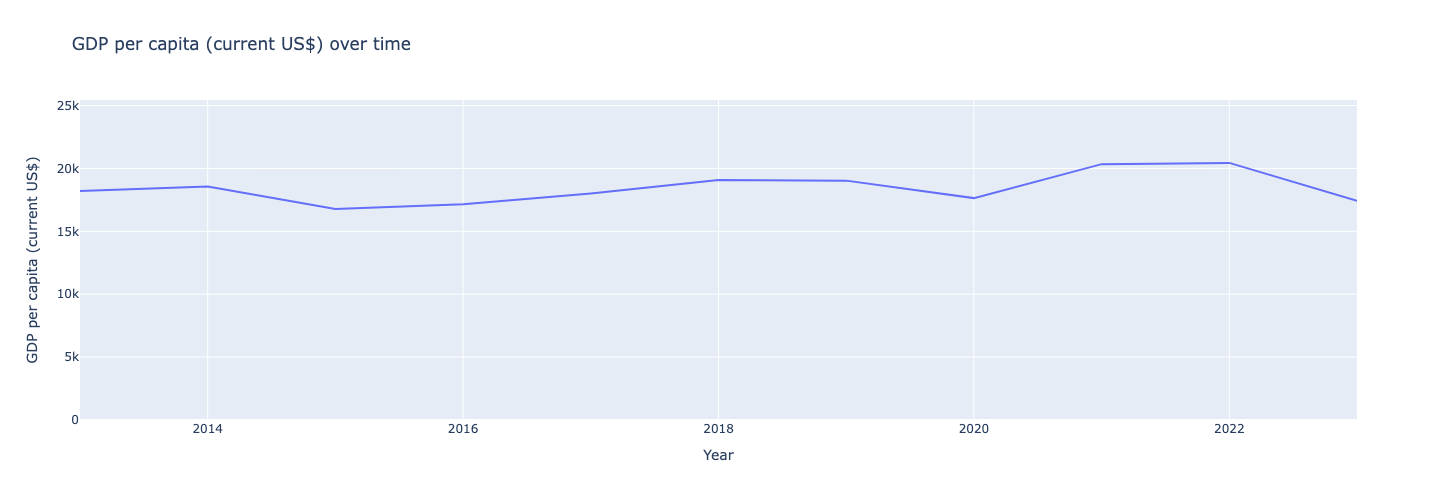

In [26]:
fig1 = px.line(
    gdp_avg,
    x="Year",
    y= "GDP per capita (current US$)",
    title="GDP per capita (current US$) over time",
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, gdp_avg["GDP per capita (current US$)"].max() + 5000]) 
)
fig1.show()

In [27]:
adfertility_avg = adfertility.groupby("Year")["Adolescent fertility rate (births per 1,000 women ages 15-19)"].mean().to_frame(name="Adolescent fertility rate (births per 1,000 women ages 15-19)").reset_index()
adfertility_avg

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,2013,50.909062
1,2014,49.810257
2,2015,48.435541
3,2016,46.956696
4,2017,45.542446
5,2018,44.503508
6,2019,43.676893
7,2020,42.691989
8,2021,42.054922
9,2022,41.253120


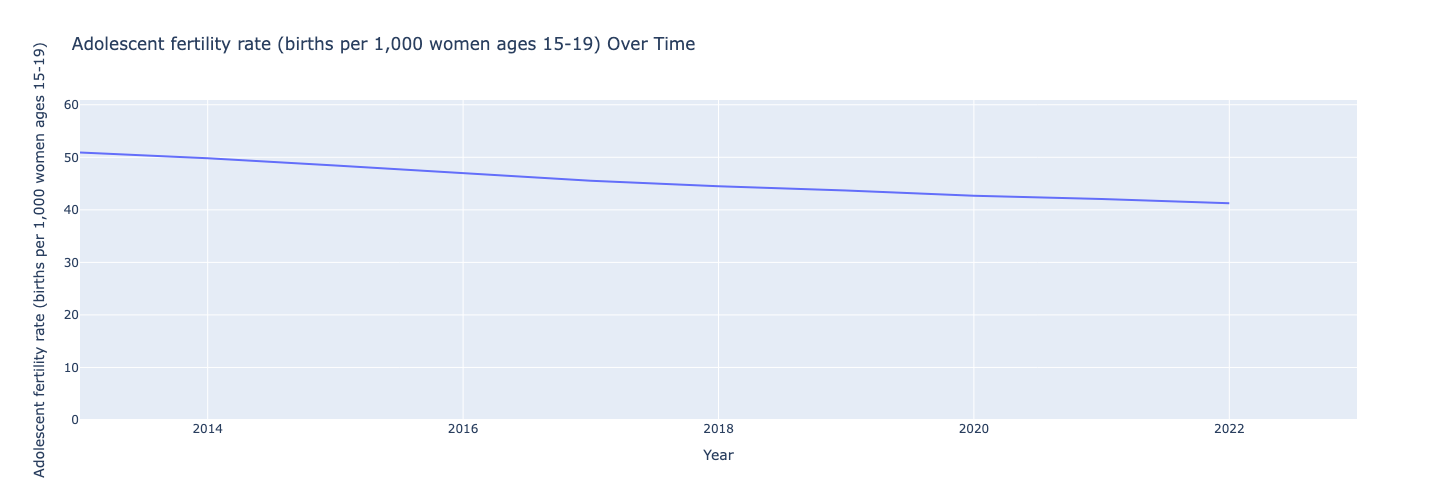

In [30]:
fig1 = px.line(
    adfertility_avg,
    x="Year",
    y= "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    title='Adolescent fertility rate (births per 1,000 women ages 15-19) Over Time',
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, adfertility_avg["Adolescent fertility rate (births per 1,000 women ages 15-19)"].max() + 10]) 
)
fig1.show()

In [32]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
adfertility_year = adfertility[adfertility["Year"] == Year]
merged_13 = pd.merge(gdp_year, adfertility_year[["Country Name", "Adolescent fertility rate (births per 1,000 women ages 15-19)"]], on = "Country Name", how = "left")
merged_13

,Country Name,Country Code,Year,GDP per capita (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2013,638.733181,106.537
1,Albania,ALB,2013,4413.063383,20.865
2,Algeria,DZA,2013,6044.674903,12.684
3,American Samoa,ASM,2013,12038.871592,43.498
4,Andorra,AND,2013,44747.753864,6.989
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2013,34597.976694,42.395
213,West Bank and Gaza,PSE,2013,3315.297539,53.427
214,"Yemen, Rep.",YEM,2013,1497.747941,68.876
215,Zambia,ZMB,2013,1840.320553,131.696


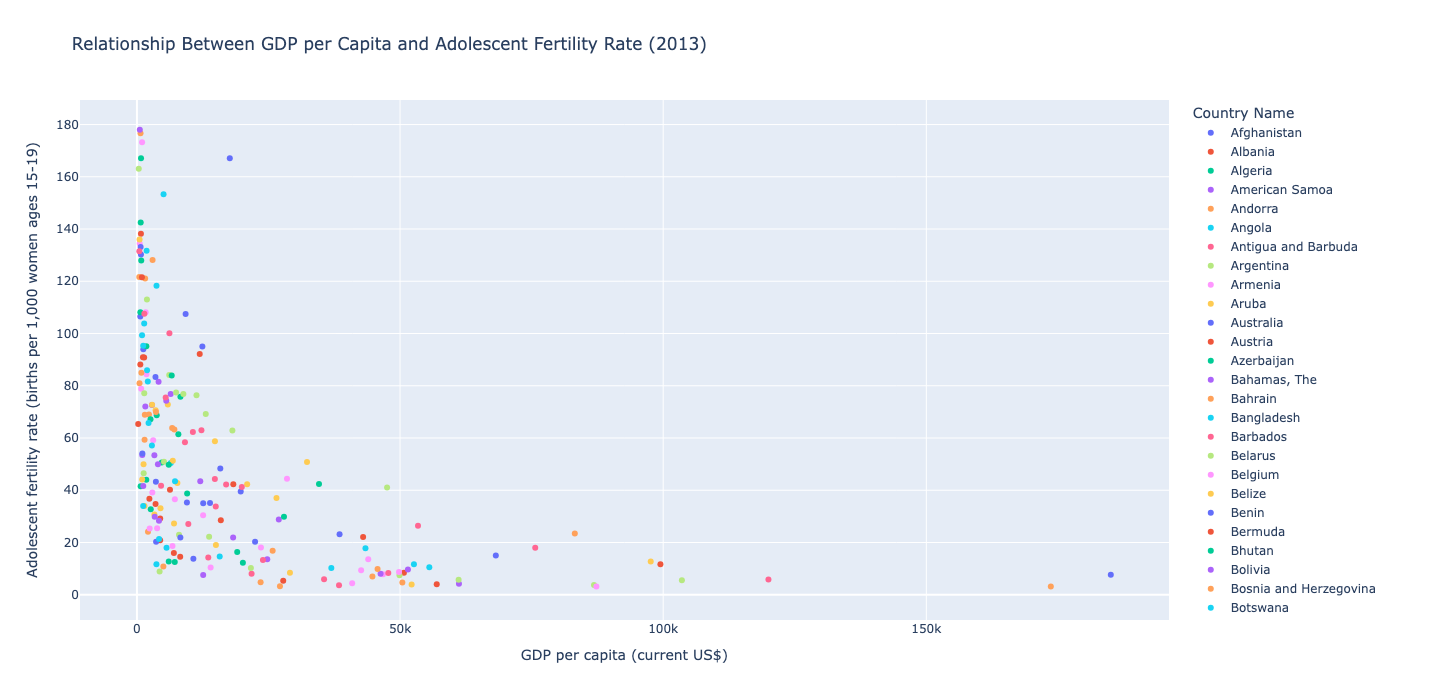

In [34]:
scatterplot_gdp_fertility = px.scatter(merged_13, 
                            x="GDP per capita (current US$)", 
                            y="Adolescent fertility rate (births per 1,000 women ages 15-19)", 
                            color="Country Name",
                            title = "Relationship Between GDP per Capita and Adolescent Fertility Rate (2013)",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_fertility.show()

In [35]:
adfertility_avg = adfertility.groupby("Year")["Adolescent fertility rate (births per 1,000 women ages 15-19)"].mean().to_frame(name="Adolescent fertility rate (births per 1,000 women ages 15-19)").reset_index()
adfertility_avg

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,2013,50.909062
1,2014,49.810257
2,2015,48.435541
3,2016,46.956696
4,2017,45.542446
5,2018,44.503508
6,2019,43.676893
7,2020,42.691989
8,2021,42.054922
9,2022,41.253120


In [38]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
adfertility_year = adfertility[adfertility["Year"] == Year]
merged_22 = pd.merge(gdp_year, adfertility_year[["Country Name", "Adolescent fertility rate (births per 1,000 women ages 15-19)"]], on = "Country Name", how = "left")
merged_22

,Country Name,Country Code,Year,GDP per capita (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Afghanistan,AFG,2022,352.603733,79.735
1,Albania,ALB,2022,6810.114041,14.460
2,Algeria,DZA,2022,5023.252932,11.564
3,American Samoa,ASM,2022,19673.390102,29.989
4,Andorra,AND,2022,42350.697069,5.910
...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,2022,NaN,29.905
213,West Bank and Gaza,PSE,2022,3799.955270,42.901
214,"Yemen, Rep.",YEM,2022,NaN,52.497
215,Zambia,ZMB,2022,1456.901570,116.091


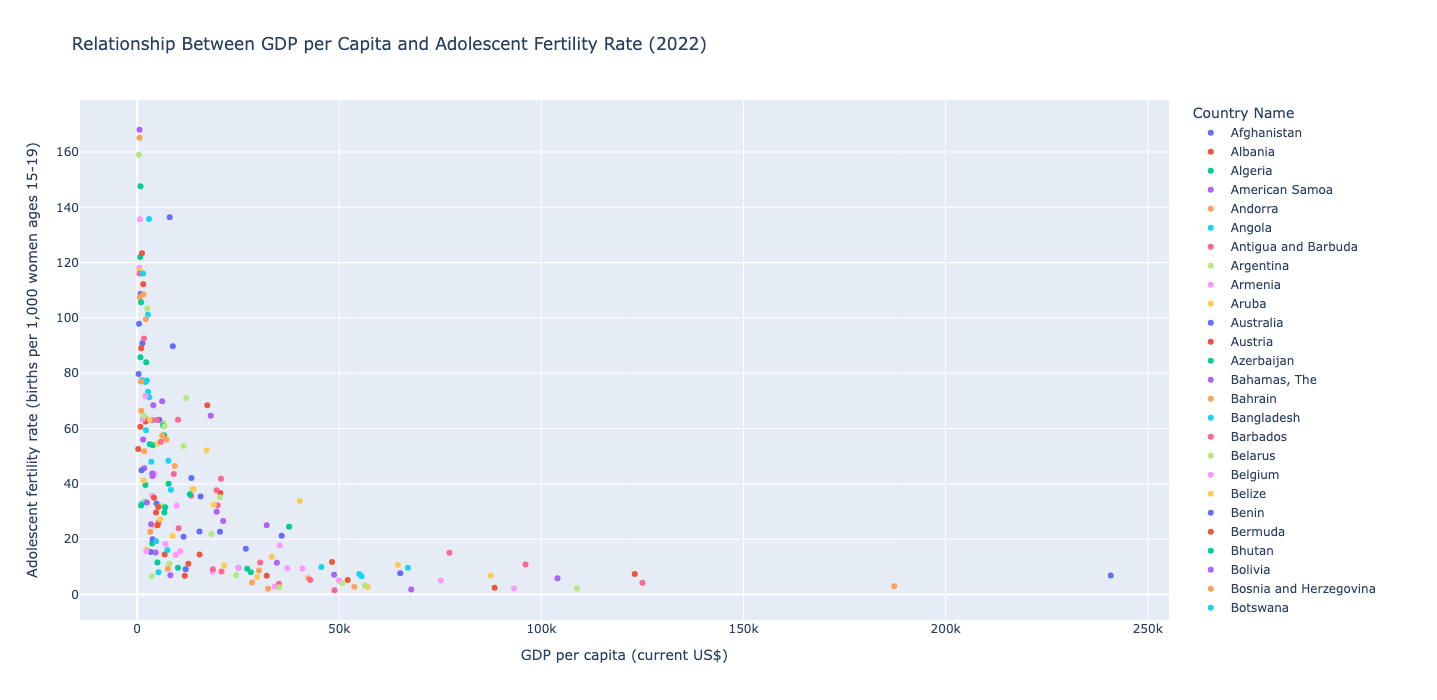

In [40]:
scatterplot_gdp_fertility2 = px.scatter(merged_22, 
                            x="GDP per capita (current US$)", 
                            y="Adolescent fertility rate (births per 1,000 women ages 15-19)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Adolescent Fertility Rate (2022)",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_fertility2.show()

In [84]:
# Want to see the statistical summary, there can´t be missing values. This step fills any missing values in the numeric columns with the mean of each respective column.
numeric_columns = merged_22.select_dtypes(include=['number'])
merged_22[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

X = sm.add_constant(merged_22[["GDP per capita (current US$)"]])
y = merged_22["Adolescent fertility rate (births per 1,000 women ages 15-19)"]

model = sm.OLS(y, X).fit()

print(model.summary())

                                                  OLS Regression Results                                                 
Dep. Variable:     Adolescent fertility rate (births per 1,000 women ages 15-19)   R-squared:                       0.216
Model:                                                                       OLS   Adj. R-squared:                  0.212
Method:                                                            Least Squares   F-statistic:                     59.18
Date:                                                           Sun, 08 Dec 2024   Prob (F-statistic):           5.13e-13
Time:                                                                   18:11:01   Log-Likelihood:                -1063.4
No. Observations:                                                            217   AIC:                             2131.
Df Residuals:                                                                215   BIC:                             2138.
Df Model:               

The R-squared value (0.216) suggests that GDP per capita explains about 21.6% of the variation in adolescent fertility rates, which is a moderate level of explanatory power.
There is a negative relationship between GDP per capita and the adolescent fertility rate: as GDP per capita increases, the adolescent fertility rate tends to decrease.
The coefficient for GDP per capita is statistically significant with a p-value of 0.000, indicating that this variable has a meaningful impact on adolescent fertility.

The second relationship I will explore is between GDP per capita and Life expectancy at birth, total (years)

In [43]:
indicator_name = "Life expectancy at birth, total (years)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

lifeexpectancy = indicator_df(wb_df, indicator_name)
lifeexpectancy

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,2013,62.417
1,Albania,ALB,2013,78.123
2,Algeria,DZA,2013,74.615
3,American Samoa,ASM,2013,NaN
4,Andorra,AND,2013,NaN
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,NaN
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


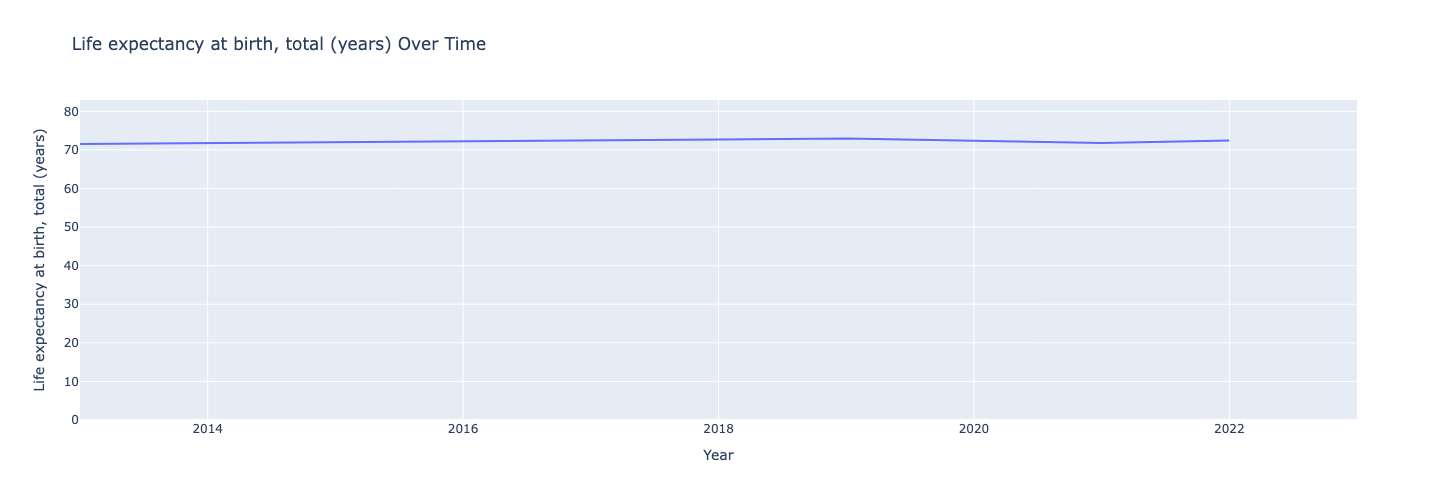

In [45]:
lifeexpectancy_avg = lifeexpectancy.groupby("Year")["Life expectancy at birth, total (years)"].mean().to_frame(name="Life expectancy at birth, total (years)").reset_index()

fig1 = px.line(
    lifeexpectancy_avg,
    x="Year",
    y= "Life expectancy at birth, total (years)",
    title="Life expectancy at birth, total (years) Over Time",
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, lifeexpectancy_avg["Life expectancy at birth, total (years)"].max() + 10]) 
)

fig1

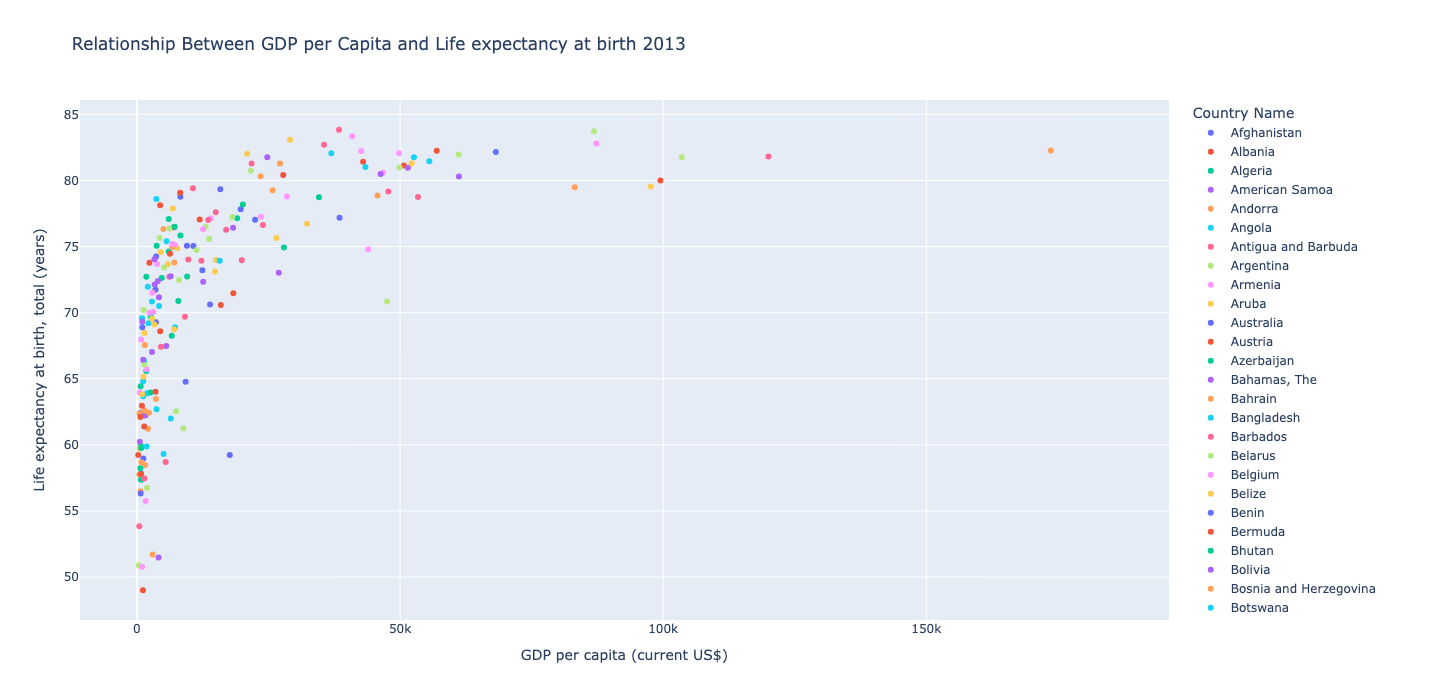

In [47]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
lifeexpectancy_year = lifeexpectancy[lifeexpectancy["Year"] == Year]
merged_gdp_lifeex_13 = pd.merge(gdp_year, lifeexpectancy_year[["Country Name", "Life expectancy at birth, total (years)"]], on = "Country Name", how = "left")

scatterplot_gdp_lifeexp = px.scatter(merged_gdp_lifeex_13, 
                            x="GDP per capita (current US$)", 
                            y="Life expectancy at birth, total (years)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Life expectancy at birth 2013",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_lifeexp.show()

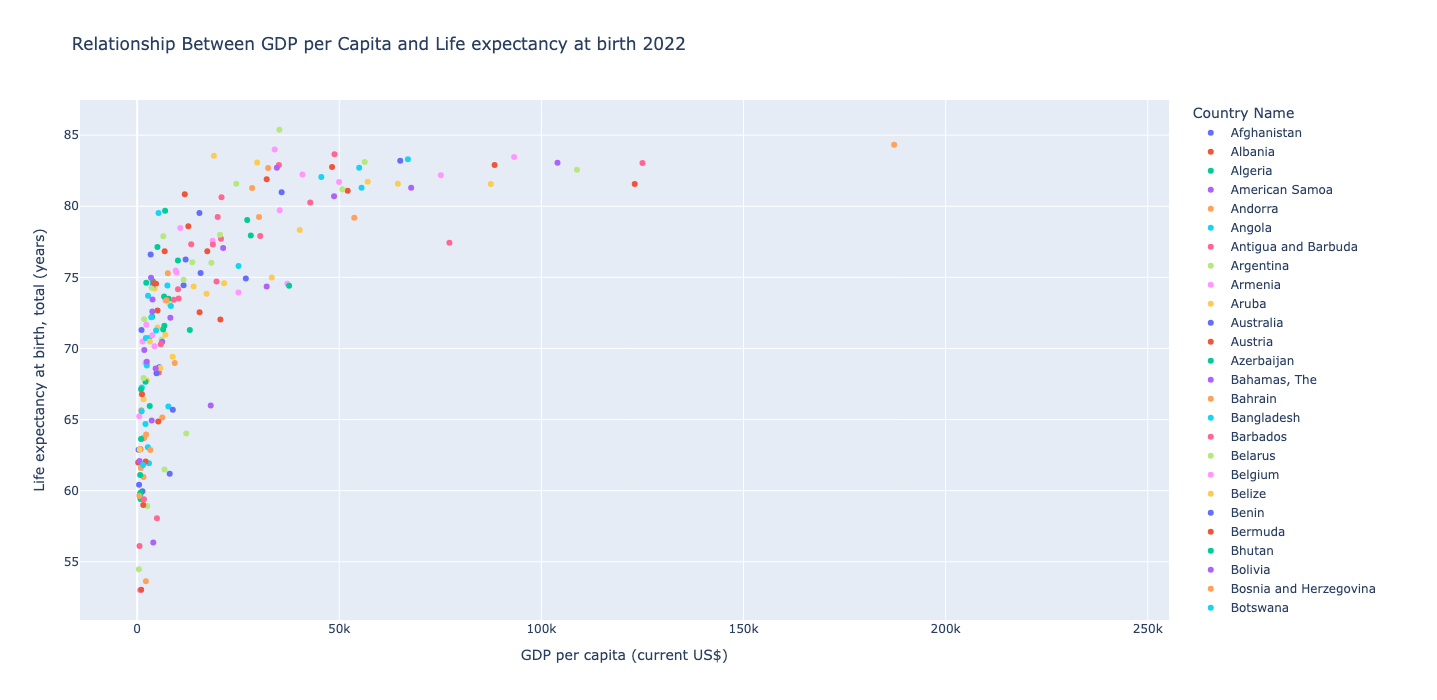

In [48]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
lifeexpectancy_year = lifeexpectancy[lifeexpectancy["Year"] == Year]
merged_gdp_lifeex_22 = pd.merge(gdp_year, lifeexpectancy_year[["Country Name", "Life expectancy at birth, total (years)"]], on = "Country Name", how = "left")

scatterplot_gdp_lifeexp2 = px.scatter(merged_gdp_lifeex_22, 
                            x="GDP per capita (current US$)", 
                            y="Life expectancy at birth, total (years)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Life expectancy at birth 2022",
                            #text="Country Code",
                            width=1100,     
                            height=700,
)
scatterplot_gdp_lifeexp2.show()

In [82]:
# Want to see the statistical summary, there can´t be missing values. This step fills any missing values in the numeric columns with the mean of each respective column.
numeric_columns = merged_gdp_lifeex_22.select_dtypes(include=['number'])
merged_gdp_lifeex_22[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

X = sm.add_constant(merged_gdp_lifeex_22[["GDP per capita (current US$)"]])
y = merged_gdp_lifeex_22["Life expectancy at birth, total (years)"]

model = sm.OLS(y, X).fit()

print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                       0.275
Model:                                                 OLS   Adj. R-squared:                  0.272
Method:                                      Least Squares   F-statistic:                     81.66
Date:                                     Sun, 08 Dec 2024   Prob (F-statistic):           9.54e-17
Time:                                             18:09:55   Log-Likelihood:                -711.70
No. Observations:                                      217   AIC:                             1427.
Df Residuals:                                          215   BIC:                             1434.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


The R-squared value (0.275) suggests that GDP per capita explains about 27.5% of the variation in life expectancy, which is a moderate level of explanatory power.
The relationship between GDP per capita and life expectancy is positive and statistically significant (p-value = 0.000).

The third relationship I will look at is between GDP per capita and Literacy rate, adult total (% of people ages 15 and above). 

In [52]:
indicator_name = "Literacy rate, adult total (% of people ages 15 and above)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

literacy_df = indicator_df(wb_df, indicator_name)
literacy_df

,Country Name,Country Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,2013,NaN
1,Albania,ALB,2013,NaN
2,Algeria,DZA,2013,NaN
3,American Samoa,ASM,2013,NaN
4,Andorra,AND,2013,NaN
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,NaN
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


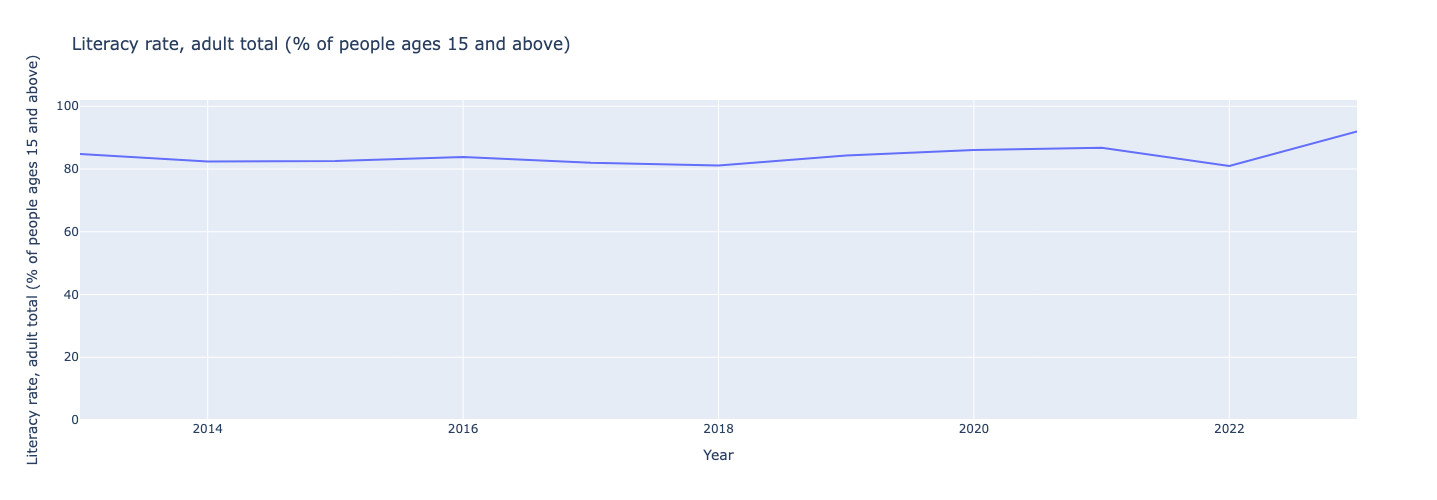

In [54]:
literacy_avg = literacy_df.groupby("Year")["Literacy rate, adult total (% of people ages 15 and above)"].mean().to_frame(name="Literacy rate, adult total (% of people ages 15 and above)").reset_index()
literacy_avg

fig1 = px.line(
    literacy_avg,
    x="Year",
    y= "Literacy rate, adult total (% of people ages 15 and above)",
    title="Literacy rate, adult total (% of people ages 15 and above)",
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, literacy_avg["Literacy rate, adult total (% of people ages 15 and above)"].max() + 10]) 
)

fig1

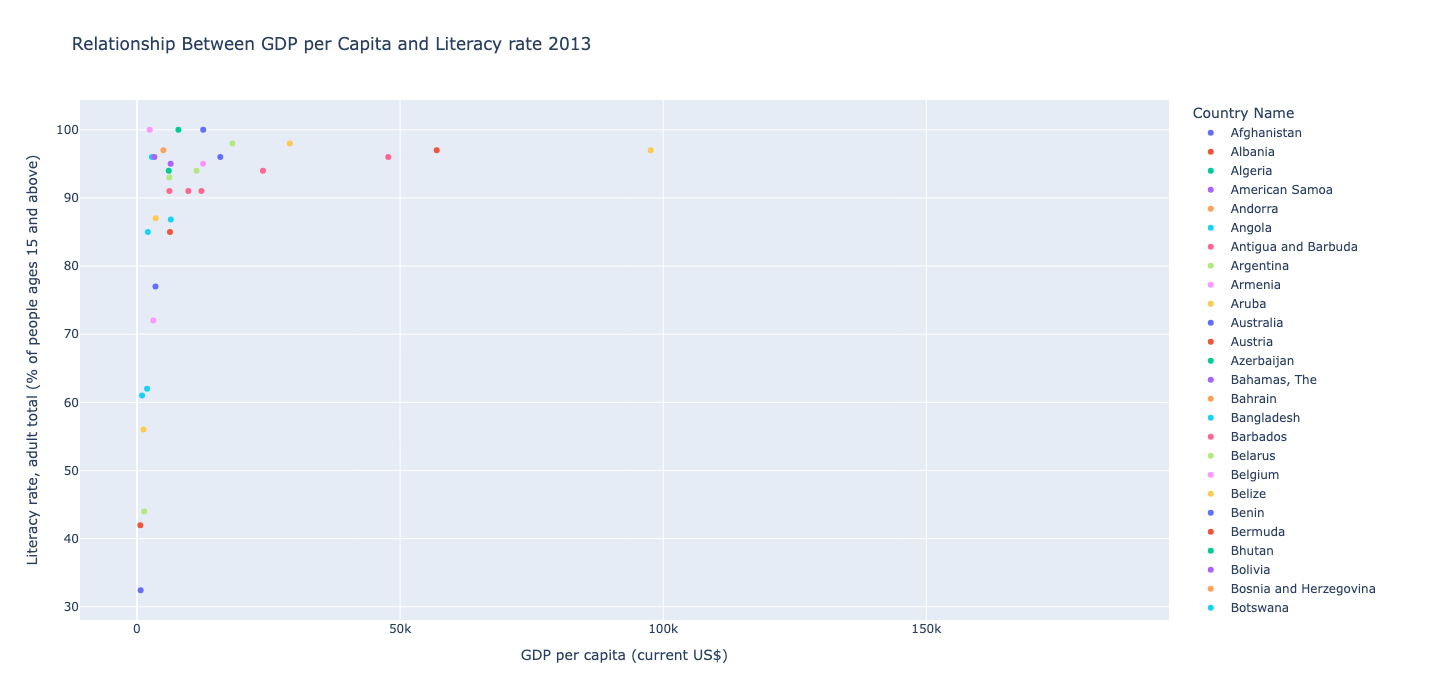

In [56]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
literacy_year = literacy_df[literacy_df["Year"] == Year]
merged_gdp_literacy_13 = pd.merge(gdp_year, literacy_year[["Country Name", "Literacy rate, adult total (% of people ages 15 and above)"]], on = "Country Name", how = "left")

scatterplot_gdp_literacy = px.scatter(merged_gdp_literacy_13, 
                            x="GDP per capita (current US$)", 
                            y="Literacy rate, adult total (% of people ages 15 and above)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Literacy rate 2013",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_literacy.show()

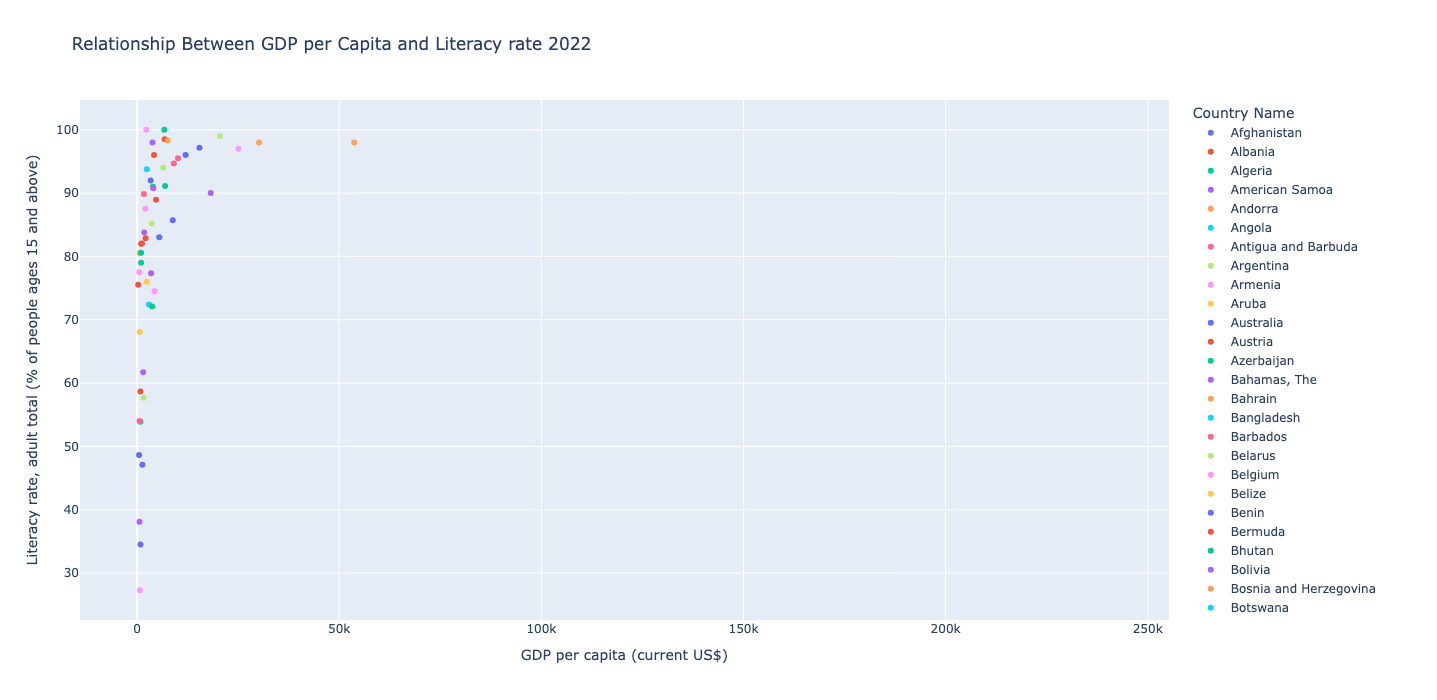

In [57]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
literacy_year = literacy_df[literacy_df["Year"] == Year]
merged_gdp_literacy_22 = pd.merge(gdp_year, literacy_year[["Country Name", "Literacy rate, adult total (% of people ages 15 and above)"]], on = "Country Name", how = "left")

scatterplot_gdp_literacy = px.scatter(merged_gdp_literacy_22, 
                            x="GDP per capita (current US$)", 
                            y="Literacy rate, adult total (% of people ages 15 and above)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Literacy rate 2022",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_literacy.show()

In [79]:
# Want to see the statistical summary, there can´t be missing values. This step fills any missing values in the numeric columns with the mean of each respective column.
numeric_columns = merged_gdp_literacy_22.select_dtypes(include=['number'])
merged_gdp_literacy_22[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

X = sm.add_constant(merged_gdp_literacy_22[["GDP per capita (current US$)"]])
y = merged_gdp_literacy_22["Literacy rate, adult total (% of people ages 15 and above)"]

model = sm.OLS(y, X).fit()

print(model.summary())

                                                OLS Regression Results                                                
Dep. Variable:     Literacy rate, adult total (% of people ages 15 and above)   R-squared:                       0.005
Model:                                                                    OLS   Adj. R-squared:                  0.001
Method:                                                         Least Squares   F-statistic:                     1.166
Date:                                                        Sun, 08 Dec 2024   Prob (F-statistic):              0.281
Time:                                                                18:07:57   Log-Likelihood:                -786.72
No. Observations:                                                         217   AIC:                             1577.
Df Residuals:                                                             215   BIC:                             1584.
Df Model:                                       

The model explains very little of the variation in the literacy rate (R-squared = 0.005).
The p-value for GDP per capita (0.281) suggests that it is not statistically significant as a predictor of literacy rates.
The effect of GDP per capita on literacy rates is very small and not statistically significant.

The fourth relationship I will look at is between GDP per capita and Primary completion rate, total (% of relevant age group).

In [61]:
indicator_name = "Primary completion rate, total (% of relevant age group)"

def indicator_df(df, indicator_name):
    new_df = df[df['Series Name'] == indicator_name]
    new_df = new_df[['Country Name', 'Country Code','2013','2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
    new_df = pd.melt(
        new_df,
        id_vars = ["Country Name", "Country Code"],
        var_name = "Year",
        value_name = indicator_name,
    )
    new_df["Year"] = new_df["Year"].astype(int)
    return new_df

primarycomp_df = indicator_df(wb_df, indicator_name)
primarycomp_df

,Country Name,Country Code,Year,"Primary completion rate, total (% of relevant age group)"
0,Afghanistan,AFG,2013,NaN
1,Albania,ALB,2013,91.119209
2,Algeria,DZA,2013,101.996597
3,American Samoa,ASM,2013,NaN
4,Andorra,AND,2013,NaN
...,...,...,...,...
2382,Virgin Islands (U.S.),VIR,2023,NaN
2383,West Bank and Gaza,PSE,2023,91.464851
2384,"Yemen, Rep.",YEM,2023,NaN
2385,Zambia,ZMB,2023,NaN


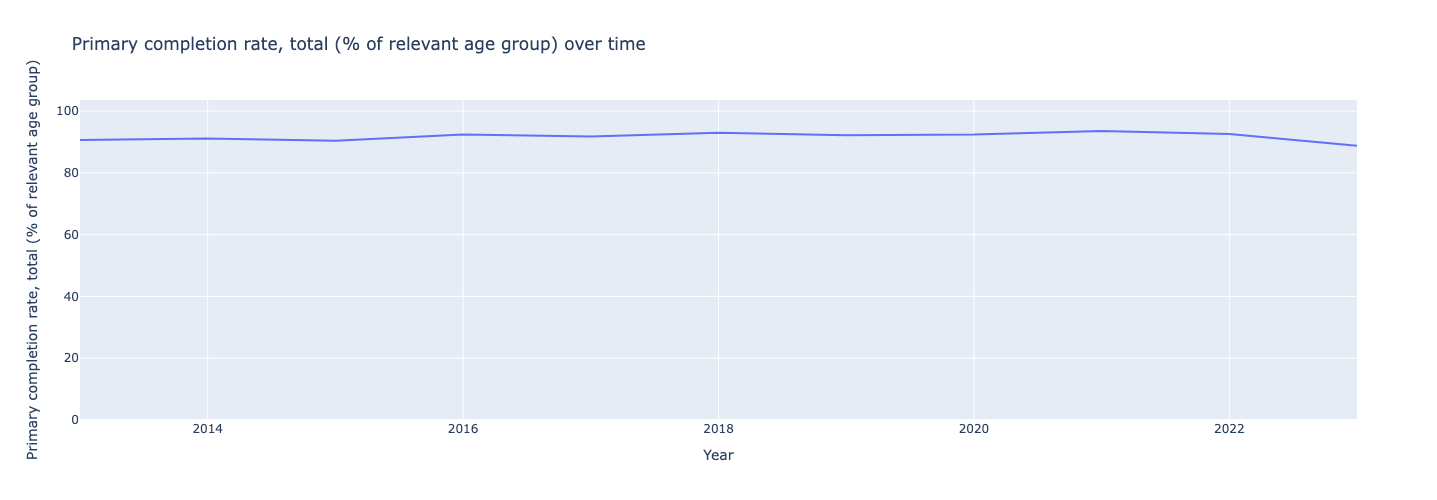

In [63]:
primarycomp_avg = primarycomp_df.groupby("Year")["Primary completion rate, total (% of relevant age group)"].mean().to_frame(name="Primary completion rate, total (% of relevant age group)").reset_index()
primarycomp_avg

fig1 = px.line(
    primarycomp_avg,
    x="Year",
    y= "Primary completion rate, total (% of relevant age group)",
    title="Primary completion rate, total (% of relevant age group) over time",
    width=900,     
    height=500)

fig1.update_layout(
    yaxis=dict(range=[0, primarycomp_avg["Primary completion rate, total (% of relevant age group)"].max() + 10]) 
)

fig1

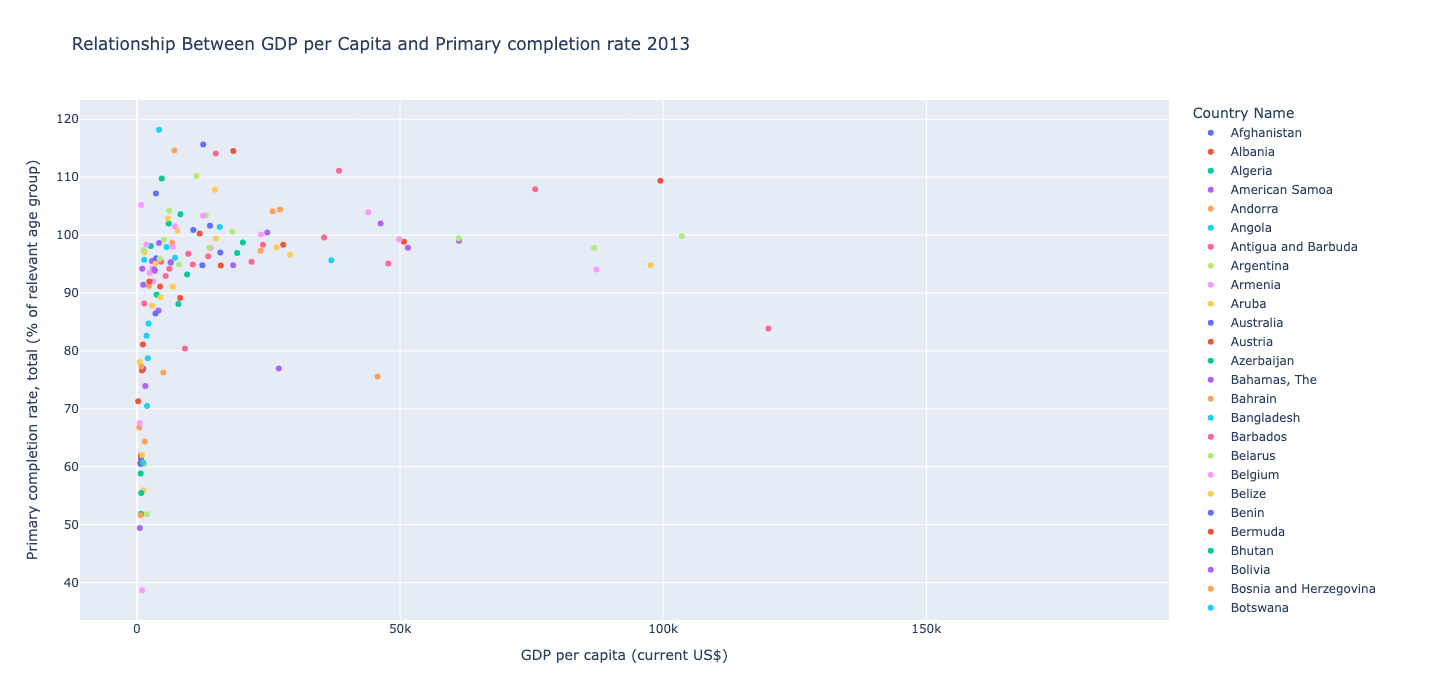

In [65]:
Year = 2013
gdp_year = gdp_df[gdp_df["Year"] == Year]
primarycom_year = primarycomp_df[primarycomp_df["Year"] == Year]
merged_gdp_primary_13 = pd.merge(gdp_year, primarycom_year[["Country Name", "Primary completion rate, total (% of relevant age group)"]], on = "Country Name", how = "left")

scatterplot_gdp_literacy = px.scatter(merged_gdp_primary_13, 
                            x="GDP per capita (current US$)", 
                            y="Primary completion rate, total (% of relevant age group)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Primary completion rate 2013",
                            #text="Country Code",
                            width=1100,     
                            height=700
)
scatterplot_gdp_literacy.show()

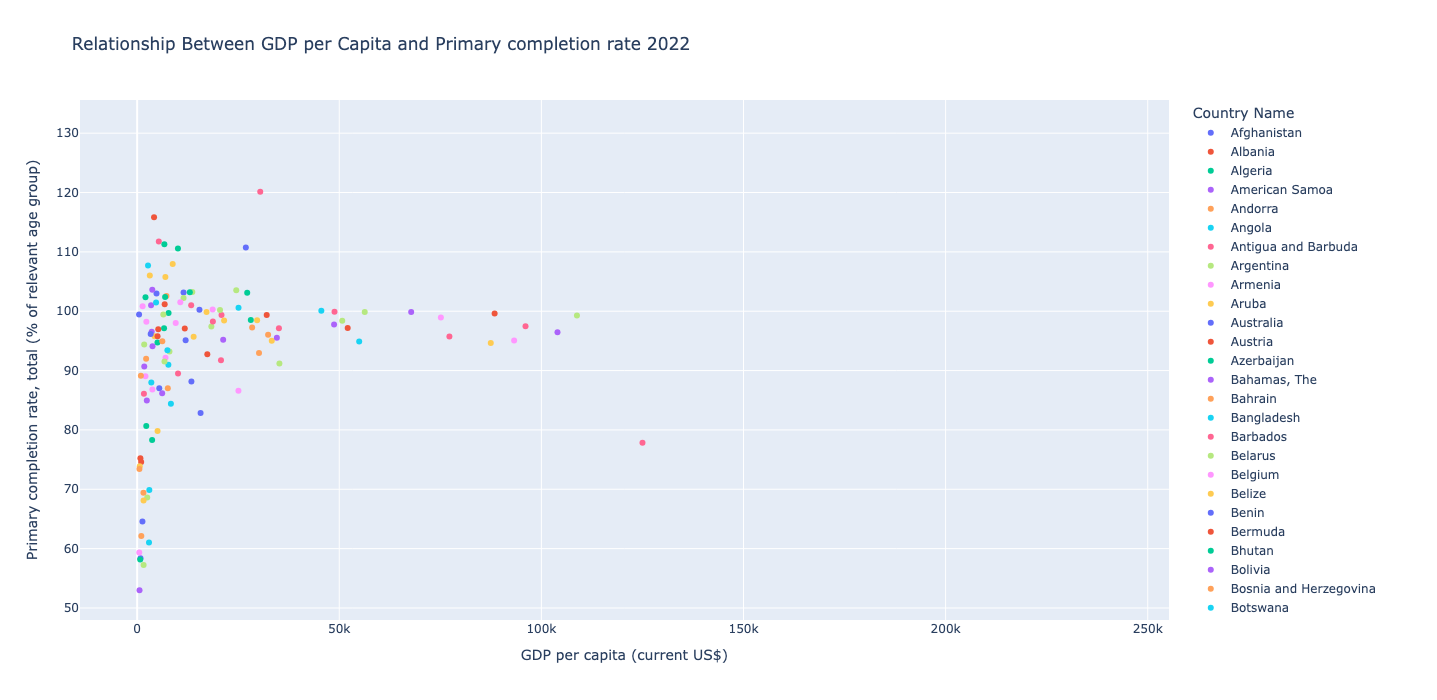

In [67]:
Year = 2022
gdp_year = gdp_df[gdp_df["Year"] == Year]
primarycom_year = primarycomp_df[primarycomp_df["Year"] == Year]
merged_gdp_primary_22 = pd.merge(gdp_year, primarycom_year[["Country Name", "Primary completion rate, total (% of relevant age group)"]], on = "Country Name", how = "left")

scatterplot_gdp_literacy = px.scatter(merged_gdp_primary_22, 
                            x="GDP per capita (current US$)", 
                            y="Primary completion rate, total (% of relevant age group)", 
                            color="Country Name",
                            title ="Relationship Between GDP per Capita and Primary completion rate 2022",
                            #text="Country Code",
                            width=1100,     
                            height=700,
                            trendline="ols"
)
scatterplot_gdp_literacy.show()

Now, I want to perform an Ordinary Least Squares (OLS) regression analysis to understand the relationship between GDP per capita (current US$) and the Primary completion rate, total (% of relevant age group). 

In [77]:
# Want to see the statistical summary, there can´t be missing values. This step fills any missing values in the numeric columns with the mean of each respective column.
numeric_columns = merged_gdp_primary_22.select_dtypes(include=['number'])
merged_gdp_primary_22[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

X = sm.add_constant(merged_gdp_primary_22[["GDP per capita (current US$)"]])
y = merged_gdp_primary_22["Primary completion rate, total (% of relevant age group)"]

model = sm.OLS(y, X).fit()

print(model.summary())

                                               OLS Regression Results                                               
Dep. Variable:     Primary completion rate, total (% of relevant age group)   R-squared:                       0.016
Model:                                                                  OLS   Adj. R-squared:                  0.011
Method:                                                       Least Squares   F-statistic:                     3.393
Date:                                                      Sun, 08 Dec 2024   Prob (F-statistic):             0.0669
Time:                                                              17:29:04   Log-Likelihood:                -818.12
No. Observations:                                                       217   AIC:                             1640.
Df Residuals:                                                           215   BIC:                             1647.
Df Model:                                                       

The model explains very little of the variation in the primary completion rate (R-squared = 0.016).
The relationship between GDP per capita and primary completion rate is weak, and the p-value for GDP per capita (0.067) suggests it is marginally significant at best.
Given these results, GDP per capita is not a strong predictor of primary completion rates, and the model's low explanatory power suggests that other factors should be considered in further analysis.